# <span style="color:red"> Lezione 11 </span>
## <span style="color:green"> Esercizio 11.1 </span>

Per fare un semplice fit con una retta ho creato una rete neurale di un singolo neurone.

In [69]:
#starting neural network

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ho deciso di aumentare significativamente il numero di dati usati per il training, in quanto ho notato che diminuiscono significativamente la loss diminuendo notevolmente il numero di epoche da usare.

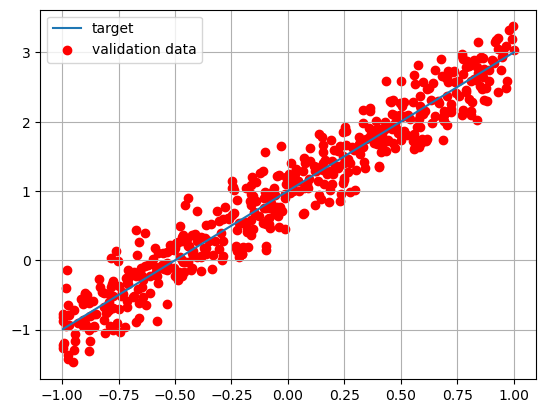

In [70]:
#building training data
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

#print training dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Con il significativo aumento dei punti usati per il training, è stato possibile ridurre il numero di erpoche. Si può notare che la loss converge dopo sole 6 epoche.

In [71]:
#training module
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=10,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/10
157/157 [==============================] - 0s 960us/step - loss: 2.0477 - mse: 2.0477 - val_loss: 0.5862 - val_mse: 0.5862
Epoch 2/10
157/157 [==============================] - 0s 650us/step - loss: 0.3098 - mse: 0.3098 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 3/10
157/157 [==============================] - 0s 625us/step - loss: 0.1150 - mse: 0.1150 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 4/10
157/157 [==============================] - 0s 625us/step - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0861 - val_mse: 0.0861
Epoch 5/10
157/157 [==============================] - 0s 690us/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.0857 - val_mse: 0.0857
Epoch 6/10
157/157 [==============================] - 0s 660us/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0857 - val_mse: 0.0857
Epoch 7/10
157/157 [==============================] - 0s 682us/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0858 - val_mse: 0.0858
Epoch 8/10
157/157 [==============================] - 0s 691us

In [72]:
# return weights and biases
model.get_weights()

[array([[1.9971813]], dtype=float32), array([0.9987732], dtype=float32)]

In [73]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 930us/step - loss: 0.0858 - mse: 0.0858

Test loss: 0.08575831353664398
Test accuracy: 0.08575831353664398


Ho ottenuto una loss identica sia per il modello di training sia per quello di test.

Infatti possiamo vedere che i punti generati corrispondono.

4/4 [==============================] - 0s 1ms/step


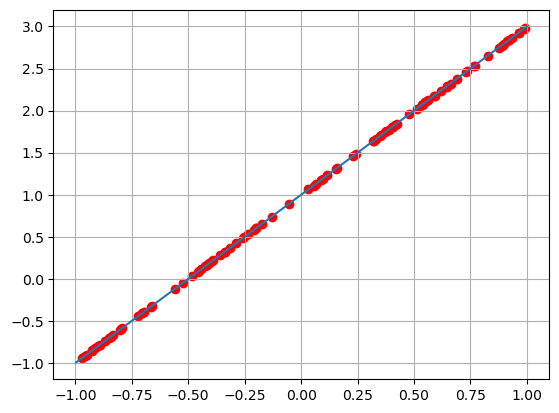

In [81]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## <span style="color:green"> Esercizio 11.2 </span>

Cerco di fare un fit di: $$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Questa volta è necessario usare più layer, ho quindi deciso di usare 5 layer densi.

In [116]:
model2 = tf.keras.Sequential()
model2.add(Dense(50, input_shape=(1,),activation="relu"))
model2.add(Dense(10,activation="relu"))
model2.add(Dense(8,activation="relu"))
model2.add(Dense(5,activation="relu"))
model2.add(Dense(5,activation="relu"))
model2.add(Dense(1,activation="relu"))


# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 50)                100       
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
 dense_48 (Dense)            (None, 8)                 88        
                                                                 
 dense_49 (Dense)            (None, 5)                 45        
                                                                 
 dense_50 (Dense)            (None, 5)                 30        
                                                                 
 dense_51 (Dense)            (None, 1)                 6         
                                                                 
Total params: 779
Trainable params: 779
Non-trainable

Nuovamente, ho aumentato i punti per il training per diminuire le epoche.

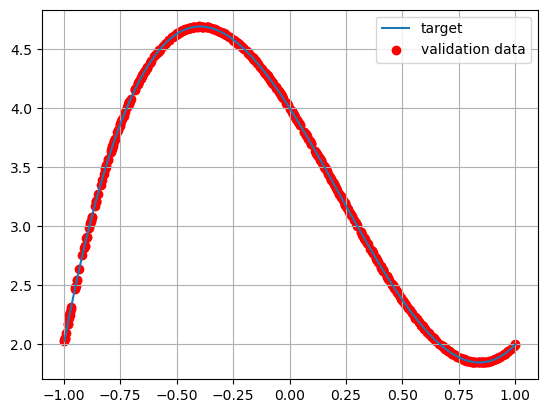

In [117]:
# the function is a + bx + cx^2 + dx^3

a=4
b=-3
c=-2
d=3

import numpy as np

# generate training inputs
np.random.seed(0)
x_train2 = np.random.uniform(-1, 1, 5000)
x_valid2 = np.random.uniform(-1, 1, 500)
x_valid2.sort()
y_target2 = a + b*(x_valid2) + c*(x_valid2**2) + d*(x_valid2**3)  # ideal (target) linear function

sigma2 = 0. 
y_train2 = np.random.normal(a + b*(x_train2) + c*(x_train2**2) + d*(x_train2**3), sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(a + b*(x_valid2) + c*(x_valid2**2) + d*(x_valid2**3), sigma2)


plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_valid2, y_valid2, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Non abbiamo più una convergenza esatta come prima ma possiamo dire di avere raggiunto una loss ottimale dopo 20 epoche.

In [118]:
history = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

Epoch 1/20
157/157 [==============================] - 0s 1ms/step - loss: 0.7241 - mse: 0.7241 - val_loss: 0.1728 - val_mse: 0.1728
Epoch 2/20
157/157 [==============================] - 0s 756us/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 3/20
157/157 [==============================] - 0s 813us/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 4/20
157/157 [==============================] - 0s 814us/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 5/20
157/157 [==============================] - 0s 891us/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 6/20
157/157 [==============================] - 0s 882us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 7/20
157/157 [==============================] - 0s 830us/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/20
157/157 [==============================] - 0s 828us/s

In [119]:
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


#model2.get_weights()


16/16 [==============================] - 0s 870us/step - loss: 0.0017 - mse: 0.0017

Test loss: 0.0016632841434329748
Test accuracy: 0.0016632841434329748


L'affermazione sopra è confermata dal fatto che la loss del training set è circa uguale a quello di test.

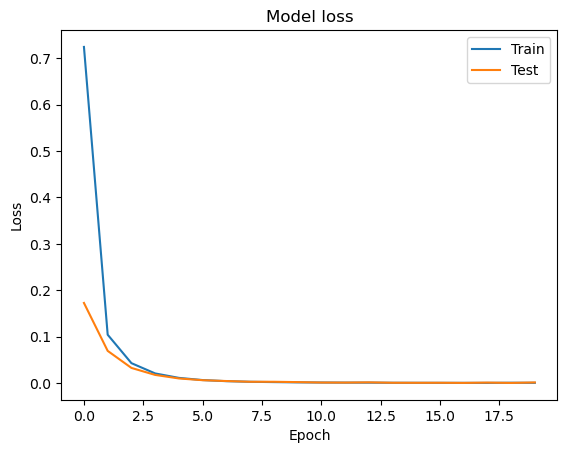

In [120]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Infatti, ho ottenuto una forma estremamente simile a quella data. Ho solo avuto qualche problema per ottenere un risultato buono per la funzione da 0.75 a 1, ma l'aumento del numero di layer fino a 6 non ha aiutato, quindi ho deciso di tenere questo come risultato.

Notiamo che al di fuori del range il modello predice risultati completamente diversi da quelli giusti.

7/7 [==============================] - 0s 979us/step


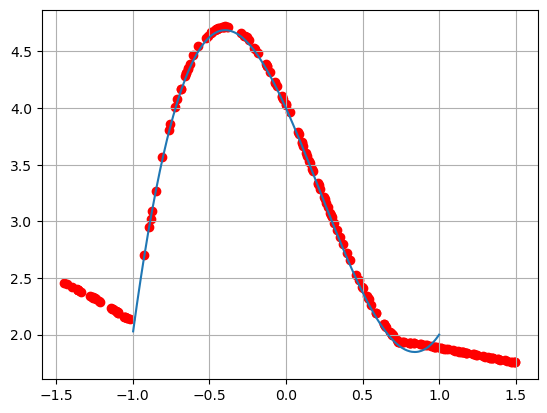

In [122]:
x_predicted2 = np.random.uniform(-1.5, 1.5, 200)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.show()

Continua sul file sin.ipynb